## xlwings  

### import 必要module

In [75]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
import os

### 打開excel物件  
xlwings 分為三個層次  
App : EXCEL 應用程式  
Book : excel檔案  
Sheet : excel 活頁簿

In [86]:
app = xw.App(visible=True, add_book=False)
# visible : 是否打開excel app

# open exists excel
wb = app.books.open('excel_temp/test.xlsx',read_only = False )

### 新增一個Sheet

In [93]:
wb.sheets.add('new1')

ValueError: Sheet named 'new1' already present in workbook

In [95]:
sht = wb.sheets[0]

<Sheet [test.xlsx]new1>

### 指定sheet

In [96]:
sht = wb.sheets[0] # by index
sht = wb.sheets['first'] # by name

### 指定欄位填值

In [56]:
sht.range('A3').value = '營管部'

In [58]:
print(sht.range('A3').value)
sht.range('A3').value = '營業管理部'
print(sht.range('A3').value)

營業管理管
營業管理部


### 從指定位置貼上list資料
該list 須為相同長度的多維list

In [59]:
sht = wb.sheets['first']
sht.range('B3').value = [['Foo 1', 'Foo 2', 'Foo 3'], 
                         [10.0, 20.0, 30.0],
                         ['A','B','C']]

### 確認指定位置延伸的表格
從指定位置由左而右由上而下偵測數值範圍，可以用來偵測目標 **連續** 範圍  
起始欄遇到空白、跨欄置中即會停止

In [60]:
sht.range('A4').expand().value

[['業務開發部', 10.0, 20.0, 30.0],
 ['營業推展部', 'A', 'B', 'C'],
 ['營業管理部', None, None, None]]

### 將dataframe資料從指定位置貼上

In [61]:
df = pd.DataFrame([[1,2], [3,4]], columns=['a', 'b'])

In [62]:
sht.range('E1').value = df

### 取出excel並轉為dataframe

In [63]:
pd.DataFrame(sht.range('E2').expand().value)

,0,1,2
0,0.0,1.0,2.0
1,1.0,3.0,4.0


### 將matplot 圖貼置excel

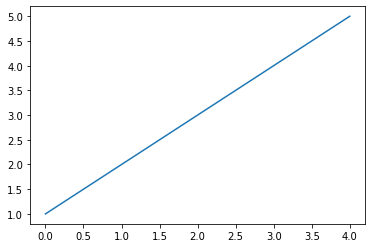

In [64]:
fig = plt.figure()
plt.plot([1, 2, 3, 4, 5])

In [67]:
sht.pictures.add(fig, name='MyPlot', update=True)

<Picture 'MyPlot' in <Sheet [test.xlsx]first>>

### 儲存作用中的excel

In [80]:
wb.save(os.path.abspath('excel_temp_2.xlsx'))

### 關閉excel

In [81]:
app.quit()